# Data Preprocessing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv('DATA/RSCCASN.csv',parse_dates = True, index_col = 'DATE')

In [5]:
df.head()

,RSCCASN
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558


In [6]:
df.columns = ['Sales']

In [7]:
df.head()

,Sales
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558


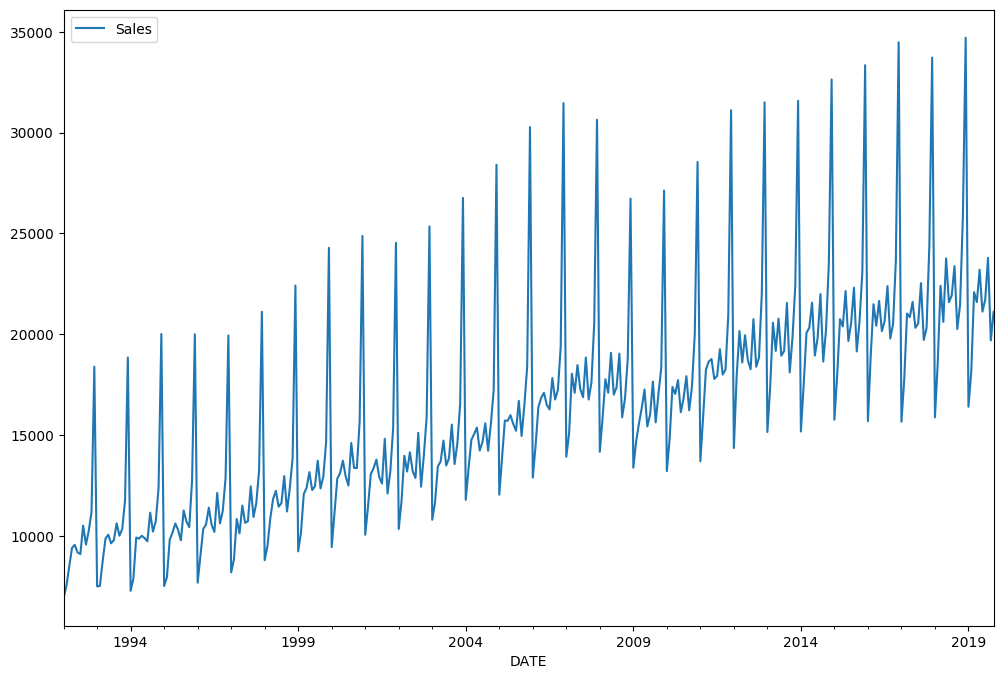

In [8]:
df.plot(figsize=(12,8))

In [9]:
len(df) # monthly data

334

In [10]:
len(df) - 18

316

In [11]:
test_size = 18
test_ind = len(df) - test_size

In [12]:
train = df.iloc[:test_ind]
test = df.iloc[test_ind:]

In [13]:
train

,Sales
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558
...,...
2017-12-01,33720
2018-01-01,15881
2018-02-01,18585


In [14]:
test

,Sales
DATE,
2018-05-01,23764
2018-06-01,21589
2018-07-01,21919
2018-08-01,23381
2018-09-01,20260
2018-10-01,21473
2018-11-01,25831
2018-12-01,34706
2019-01-01,16410


In [15]:
from sklearn.preprocessing import MinMaxScaler

In [16]:
scaler = MinMaxScaler()

In [17]:
scaler.fit(train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [18]:
scaled_train = scaler .transform(train)

In [19]:
scaled_test = scaler.transform(test)

In [20]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [21]:
len(test)

18

In [22]:
length = 12 # length of batch
generator = TimeseriesGenerator(scaled_train,scaled_train,length=length,batch_size=1)

In [23]:
X,y = generator[0]

In [24]:
X

array([[[0.        ],
        [0.02127505],
        [0.05580163],
        [0.08942056],
        [0.09512053],
        [0.08146965],
        [0.07860151],
        [0.12979233],
        [0.09566512],
        [0.1203892 ],
        [0.15426227],
        [0.41595266]]])

In [25]:
y

array([[0.02047633]])

In [26]:
scaled_train

array([[0.        ],
       [0.02127505],
       [0.05580163],
       [0.08942056],
       [0.09512053],
       [0.08146965],
       [0.07860151],
       [0.12979233],
       [0.09566512],
       [0.1203892 ],
       [0.15426227],
       [0.41595266],
       [0.02047633],
       [0.02127505],
       [0.06636654],
       [0.10633895],
       [0.11345484],
       [0.09791606],
       [0.10368864],
       [0.13396747],
       [0.11163956],
       [0.12372931],
       [0.17506535],
       [0.43250799],
       [0.0124165 ],
       [0.03499855],
       [0.10829945],
       [0.10641156],
       [0.11149434],
       [0.10728289],
       [0.10154662],
       [0.1531731 ],
       [0.11904589],
       [0.13767064],
       [0.19663085],
       [0.47480395],
       [0.02105722],
       [0.03714058],
       [0.10445106],
       [0.11726692],
       [0.13367703],
       [0.12209556],
       [0.10332559],
       [0.1570578 ],
       [0.13694453],
       [0.12710572],
       [0.21104415],
       [0.474

# Creating Model

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,SimpleRNN,LSTM

In [29]:
n_features = 1

In [30]:
model = Sequential()

model.add(LSTM(100,activation='relu',input_shape=(length,n_features)))

model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

2023-06-04 06:39:37.898952: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2
2023-06-04 06:39:37.915962: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2400000000 Hz
2023-06-04 06:39:37.916186: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x2405580 executing computations on platform Host. Devices:
2023-06-04 06:39:37.916202: I tensorflow/compiler/xla/service/service.cc:175]   StreamExecutor device (0): Host, Default Version


In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100)               40800     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [32]:
from tensorflow.keras.callbacks import EarlyStopping

In [33]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [34]:
validation_generator = TimeseriesGenerator(scaled_test,scaled_test,length=length,batch_size=1)

In [35]:
model.fit_generator(generator,epochs=20,validation_data=validation_generator,callbacks =[early_stop])

Epoch 1/20
304/304 [==============================] - 11s 36ms/step - loss: 0.0244 - val_loss: 0.0398
Epoch 2/20
304/304 [==============================] - 12s 39ms/step - loss: 0.0178 - val_loss: 0.0028
Epoch 3/20
304/304 [==============================] - 11s 37ms/step - loss: 0.0097 - val_loss: 0.0013
Epoch 4/20
304/304 [==============================] - 15s 49ms/step - loss: 0.0055 - val_loss: 0.0059
Epoch 5/20
304/304 [==============================] - 11s 36ms/step - loss: 0.0026 - val_loss: 6.9101e-04
Epoch 6/20
304/304 [==============================] - 10s 33ms/step - loss: 0.0021 - val_loss: 0.0039
Epoch 7/20
304/304 [==============================] - 10s 34ms/step - loss: 0.0016 - val_loss: 6.2065e-04
Epoch 8/20
304/304 [==============================] - 10s 34ms/step - loss: 0.0013 - val_loss: 0.0015
Epoch 9/20
304/304 [==============================] - 11s 36ms/step - loss: 0.0011 - val_loss: 0.0026


In [36]:
losses = pd.DataFrame(model.history.history)

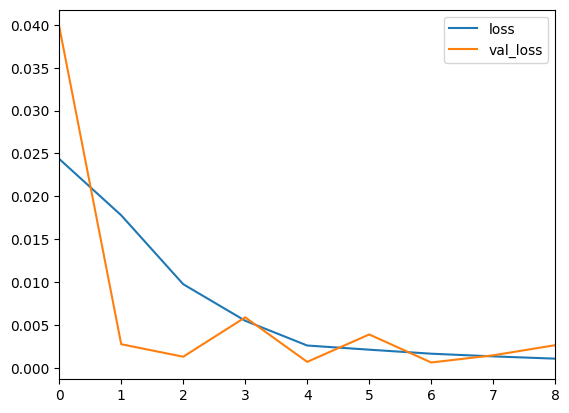

In [37]:
losses.plot()

In [38]:
test_predictions = []
first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1,length,n_features))

for i in range(len(test)):
    current_pred = model.predict(current_batch)[0]
    
    test_predictions.append(current_pred)
    
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [39]:
true_predictions = scaler.inverse_transform(test_predictions)

In [40]:
test['Predictions'] = true_predictions

/home/vboxuser/anaconda3/envs/myenv/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [41]:
test

,Sales,Predictions
DATE,,
2018-05-01,23764,22661.267885
2018-06-01,21589,21392.436213
2018-07-01,21919,21627.641574
2018-08-01,23381,23634.589422
2018-09-01,20260,20971.299342
2018-10-01,21473,21554.956362
2018-11-01,25831,25723.035398
2018-12-01,34706,35531.354279
2019-01-01,16410,17036.713322


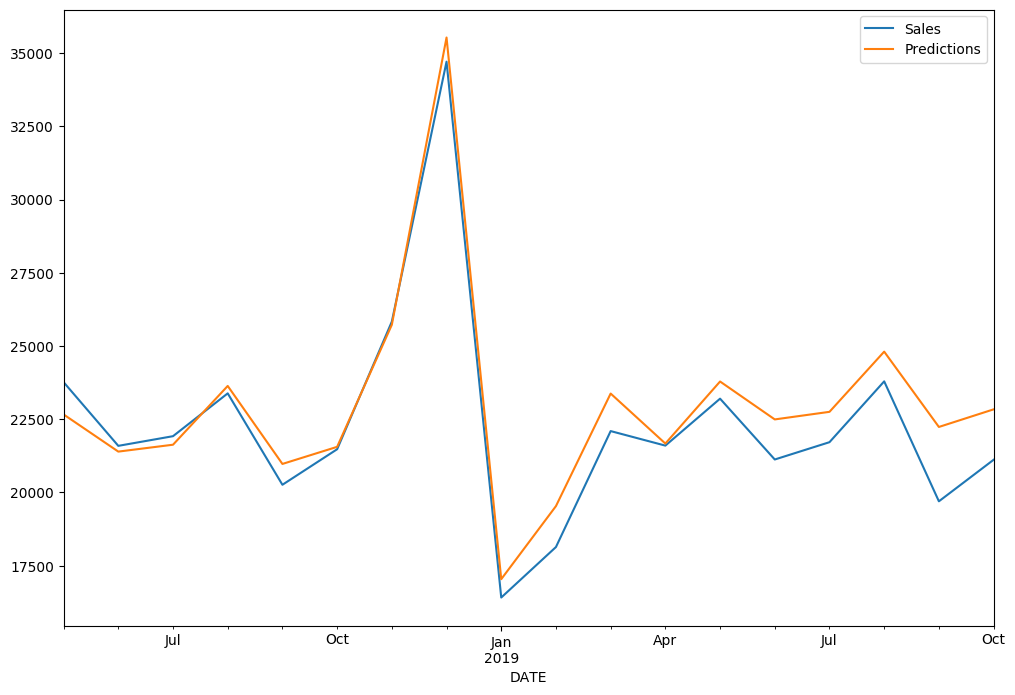

In [43]:
test.plot(figsize=(12,8))

In [44]:
# forecast
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

In [45]:
length = 12
generator = TimeseriesGenerator(scaled_full_data,scaled_full_data,length=length,batch_size=1)

In [46]:
model = Sequential()

model.add(LSTM(100,activation = 'relu', input_shape=(length,n_features)))

model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

In [47]:
model.fit_generator(generator,epochs=9)

Epoch 1/9
322/322 [==============================] - 11s 36ms/step - loss: 0.0249
Epoch 2/9
322/322 [==============================] - 10s 31ms/step - loss: 0.0175
Epoch 3/9
322/322 [==============================] - 11s 35ms/step - loss: 0.0122
Epoch 4/9
322/322 [==============================] - 11s 33ms/step - loss: 0.0055
Epoch 5/9
322/322 [==============================] - 11s 33ms/step - loss: 0.0042
Epoch 6/9
322/322 [==============================] - 10s 30ms/step - loss: 0.0018
Epoch 7/9
322/322 [==============================] - 10s 31ms/step - loss: 0.0018
Epoch 8/9
322/322 [==============================] - 10s 31ms/step - loss: 0.0011
Epoch 9/9
322/322 [==============================] - 11s 34ms/step - loss: 0.0020


In [48]:
forecast = []
periods = 12
first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1,length,n_features))

for i in range(periods):
    current_pred = model.predict(current_batch)[0]
    
    forecast.append(current_pred)
    
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [49]:
forecast = scaler.inverse_transform(forecast)

In [50]:
df

,Sales
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558
...,...
2019-06-01,21123
2019-07-01,21714
2019-08-01,23791


In [51]:
forecast

array([[21668.63608027],
       [20631.81410289],
       [20855.52474976],
       [22497.64940453],
       [20277.5391562 ],
       [20847.96613121],
       [24098.91089344],
       [33479.6473918 ],
       [17132.07110691],
       [19261.30801153],
       [22279.23914862],
       [20838.64591455]])

In [52]:
forecast_index = pd.date_range(start='2019-11-01',periods=periods,
                              freq='MS')

In [53]:
forecast_index

DatetimeIndex(['2019-11-01', '2019-12-01', '2020-01-01', '2020-02-01',
               '2020-03-01', '2020-04-01', '2020-05-01', '2020-06-01',
               '2020-07-01', '2020-08-01', '2020-09-01', '2020-10-01'],
              dtype='datetime64[ns]', freq='MS')

In [54]:
forecast_df = pd.DataFrame(data=forecast,index=forecast_index,columns=['Forecast'])

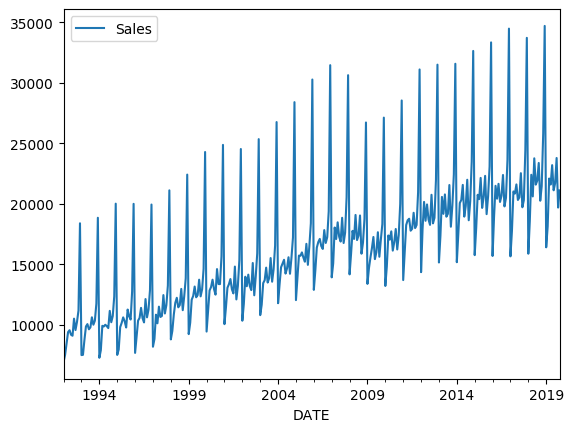

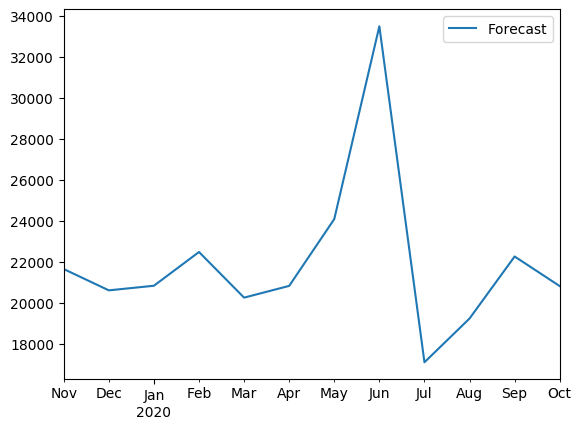

In [55]:
df.plot()
forecast_df.plot()

(576, 611)

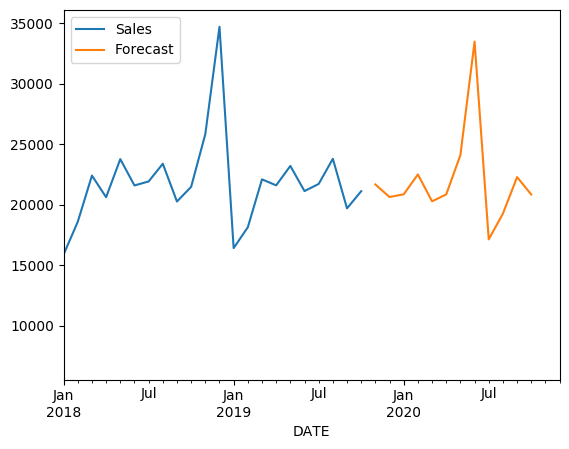

In [57]:
ax = df.plot()
forecast_df.plot(ax=ax)
plt.xlim('2018-01-01','2020-12-01')